# **Ensemble ML for YouTube Subscriber Prediction**

---
The colab link : https://colab.research.google.com/drive/1w-2V9NrjO4gqm-QJujotYiRB2B72HO3I?usp=sharing

**Team Leader:**
Yufei Shang

**Team Members:**
Wenlin Zhao, Rashi Jaiswal, Phunsok Norboo

**Dataset**:
 https://www.kaggle.com/datasets/thedevastator/youtube-video-and-channel-analytics

we get the dataset from kaggle, and the original one come from Youtube API.

**Problem Statement:**

On YouTube, knowing how many subscribers a channel might get is very important for creators, marketers, and analysts. Subscriber count is a key measure of a channel's popularity, audience interest, and potential success. However, it is hard to predict subscriber counts because many different things affect user behavior.

This project focuses on building a machine learning model to predict YouTube channel subscriber counts. We use different types of data from videos, such as numerical features and categories, to make these predictions. Our process includes cleaning the data, analyzing it, selecting useful features, and testing several machine learning models. We also improved the best models by tuning their settings and using ensemble methods like bagging and stacking.

By predicting subscriber counts, this project aims to give useful insights into what helps a channel grow. These predictions can help creators and marketers make better decisions to increase their channel's success.


---

**Dataset Describe:**

The dataset has 575,610 rows, 26 columns. Types of variables included are: Numerical variables, Categorical
variables and Data/Time variables.

1. Video Performance Metrics:

  * videoViewCount, videoLikeCount, videoDislikeCount, VideoCommentCount

2. Channel Performance Metrics:

  * channelViewCount, subscriberCount, channelCommentCount, videoCount, channelelapsedtime

3. Engagement Ratios:

  * likes/subscriber, views/subscribers, dislikes/subscriber, comments/subscriber, likes/views, dislikes/views, comments/views, likes/dislikes, totalviews/channelelapsedtime, views/elapsedtime

4. Video and Channel Identifiers:

  * channelId, videoId, videoCategoryId

5. Derived Ratios and Counts:

  * totvideos/videocount, totviews/totsubs

6. Temporal Variables:

  * elapsedtime, videoPublished

# **Import Dataset**

In [ ]:
# Importing libraries and packages required for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import statsmodels.formula.api as smf
import statsmodels.api as sm
!pip install plotly_express -q
import plotly_express as px
from sklearn.cluster import KMeans
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10

from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
data = pd.read_csv('/content/gdrive/MyDrive/810 project/YouTubeDataset.csv', index_col=0)

Mounted at /content/gdrive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575610 entries, 0 to 575609
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   totalviews/channelelapsedtime  575610 non-null  float64
 1   channelId                      575610 non-null  object 
 2   videoCategoryId                575610 non-null  int64  
 3   channelViewCount               575610 non-null  int64  
 4   likes/subscriber               575610 non-null  float64
 5   views/subscribers              575610 non-null  float64
 6   videoCount                     575610 non-null  int64  
 7   subscriberCount                575610 non-null  int64  
 8   videoId                        575610 non-null  object 
 9   dislikes/views                 575610 non-null  float64
 10  channelelapsedtime             575610 non-null  int64  
 11  comments/subscriber            575610 non-null  float64
 12  likes/views                    5756

In [ ]:
data.describe()

,totalviews/channelelapsedtime,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,dislikes/views,channelelapsedtime,comments/subscriber,...,likes/dislikes,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,VideoCommentCount
count,575610.000000,575610.000000,5.756100e+05,575610.000000,575610.000000,575610.000000,5.756100e+05,575610.000000,575610.000000,575610.000000,...,575610.000000,575610.000000,5.756100e+05,575610.000000,5.756100e+05,575610.000000,575610.000000,5.756100e+05,575610.000000,575610.000000
mean,713.682808,17.560551,4.829119e+07,0.562041,308.993792,1204.464627,8.097598e+04,-0.019370,67941.305267,0.139804,...,-0.086000,-0.019404,4.092935e+04,50755.786958,2.921508e+02,18.921494,0.074623,1.698531e+03,1.517436,39.082997
std,6481.875213,7.904187,4.630822e+08,2.804067,1584.321770,8303.754974,6.033393e+05,0.139794,20629.159278,1.485730,...,16.813385,0.143906,4.883613e+05,19725.560307,4.507472e+03,434.947624,1.264975,4.220210e+03,31.451958,557.811895
min,0.000000,1.000000,0.000000e+00,-1.000000,-1.000000,0.000000,0.000000e+00,-1.000000,888.000000,-1.000000,...,-2.000000,-1.000000,-1.000000e+00,17520.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000e+00,-0.000051,-1.000000
25%,0.773417,10.000000,5.045000e+04,0.002832,0.919155,17.000000,3.800000e+01,0.000000,51984.000000,0.000000,...,-2.000000,0.000062,1.805763e+03,34656.000000,5.000000e+00,0.000000,0.000000,3.477048e+02,0.045762,1.000000
50%,6.213229,20.000000,4.086660e+05,0.029412,11.767535,70.000000,4.080000e+02,0.000176,68400.000000,0.002498,...,-2.000000,0.000541,5.355000e+03,48480.000000,1.600000e+01,1.000000,0.000268,8.462006e+02,0.106729,4.000000
75%,56.610846,24.000000,3.616452e+06,0.273810,120.648028,336.000000,5.319000e+03,0.000554,85824.000000,0.045455,...,-2.000000,0.001579,1.784933e+04,65424.000000,6.000000e+01,5.000000,0.013707,1.829000e+03,0.347067,14.000000
max,683532.725598,44.000000,2.379817e+10,505.000000,279803.000000,415500.000000,2.525311e+07,0.322981,108913.000000,485.000000,...,1835.000000,1.003530,1.503287e+08,106609.000000,1.240473e+06,244280.000000,343.500000,1.672107e+06,11698.756213,191498.000000


**Observations:**
1. The dataset contains 55,214 YouTube videos with various metrics. The data shows significant variations in channel performance: subscriber counts range from 0 to 22.7 million (mean: 72,730), video counts range from 0 to 331,770 (mean: 1,118), and channel view counts range from 0 to 15.9 billion (mean: 40.2 million), etc. This suggesting a highly skewed distribution typical of social media platforms.
2. Some min value of columns is 0 or nagtive. We should deal with that at data clean step.

# **DATA CLEAN**

**1.Some count columns have the negative values, which is not reasonalble; Since count class variables should always be non-negative integers**

In [ ]:
# Step 1: Identify problematic channelIds
count_columns = [
    'channelViewCount', 'videoCount', 'subscriberCount',
    'channelCommentCount', 'videoViewCount', 'videoLikeCount',
    'videoDislikeCount', 'VideoCommentCount'
]

# Find all channels with negative values in any count column
problematic_channels = set()
for col in count_columns:
    negative_channels = data[data[col] < 0]['channelId'].unique()
    problematic_channels.update(negative_channels)

print(f"Number of problematic channels: {len(problematic_channels)}")

# Step 2: Remove all rows related to problematic channelIds
data = data[~data['channelId'].isin(problematic_channels)]
print(f"Remaining rows after removal: {len(data)}")

Number of problematic channels: 14432
Remaining rows after removal: 552188


**2. time series**

In [ ]:
data[['videoPublished','elapsedtime','channelelapsedtime']].head(3)

,videoPublished,elapsedtime,channelelapsedtime
index,,,
0,2012-01-19T18:38:28.000Z,50040,88705
1,2015-03-30T04:04:40.000Z,22080,93409
2,2009-08-07T06:51:10.000Z,71544,72240


In [ ]:
# Identify rows with logical issues where elapsedtime > channelelapsedtime
time_logic_issues = data[data['elapsedtime'] > data['channelelapsedtime']]

# Get the unique channelId values from these rows
problematic_channels = time_logic_issues['channelId'].unique()
print(f"Number of problematic channels: {len(problematic_channels)}")

# Remove all rows where channelId is in the problematic channel list
data = data[~data['channelId'].isin(problematic_channels)]
print(f"Remaining rows after removal: {len(data)}")

# Convert 'videoPublished' from object to datetime format
data['videoPublished'] = pd.to_datetime(data['videoPublished'], errors='coerce')
print(data['videoPublished'].dtypes)

# Check rows with invalid dates (NaT)
print(f"Number of invalid dates: {len(data[data['videoPublished'].isna()])}")

Number of problematic channels: 35
Remaining rows after removal: 552141
datetime64[ns, UTC]
Number of invalid dates: 0


**3. Many ratio values in dataset do not match the expected results based on their corresponding numerators and denominators. Therefore, we will accurately remove all ratio columns to maintain data integrity. And add them in future as needed**

In [ ]:
ratio_columns = [
    'totalviews/channelelapsedtime', 'likes/subscriber', 'views/subscribers','dislikes/views',
    'comments/subscriber', 'likes/views', 'likes/dislikes',
       'comments/views', 'totvideos/videocount', 'dislikes/subscriber',
       'totviews/totsubs', 'views/elapsedtime'
]

df_youtube = data.drop(columns=ratio_columns)
df_youtube['like_dislike_ratio'] = df_youtube['videoLikeCount'] / (df_youtube['videoDislikeCount'].replace(0, 1))


**4. The original dataset is too large, let us random sample it to make the model process fast and efficient.**

In [ ]:
df_youtube = df_youtube.sample(frac=0.1, random_state=42)

**5. create a new columns which include the hour of video published time and category them**

In [ ]:
df_youtube['publish_hour'] = df_youtube['videoPublished'].dt.hour
def categorize_hour(hour):
    if 0 <= hour < 4:
        return 'wee hours'
    elif 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'
df_youtube['TimeOfDay'] = df_youtube['publish_hour'].apply(categorize_hour)

print(f'we have{df_youtube.publish_hour.nunique()} hours, they are:',f'{np.sort(df_youtube.publish_hour.unique())}' )
print(np.sort(df_youtube.TimeOfDay.unique()))
df_youtube = df_youtube.drop('publish_hour', axis = 1)
df_youtube.info()

we have24 hours, they are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
['Afternoon' 'Early Morning' 'Evening' 'Morning' 'Night' 'wee hours']
<class 'pandas.core.frame.DataFrame'>
Index: 55214 entries, 112733 to 162741
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   channelId            55214 non-null  object             
 1   videoCategoryId      55214 non-null  int64              
 2   channelViewCount     55214 non-null  int64              
 3   videoCount           55214 non-null  int64              
 4   subscriberCount      55214 non-null  int64              
 5   videoId              55214 non-null  object             
 6   channelelapsedtime   55214 non-null  int64              
 7   channelCommentCount  55214 non-null  int64              
 8   videoViewCount       55214 non-null  int64              
 9   elapsedtime          55214 non-n

In [ ]:
df_youtube.describe()

,videoCategoryId,channelViewCount,videoCount,subscriberCount,channelelapsedtime,channelCommentCount,videoViewCount,elapsedtime,videoLikeCount,videoDislikeCount,VideoCommentCount,like_dislike_ratio
count,55214.000000,5.521400e+04,55214.000000,5.521400e+04,55214.000000,5.521400e+04,5.521400e+04,55214.000000,55214.000000,55214.000000,55214.000000,55214.000000
mean,17.488409,4.021993e+07,1117.654997,7.273009e+04,67861.601206,7.000102e+02,5.178685e+04,50866.830605,284.187634,17.649582,42.310827,18.233183
std,7.855530,3.450480e+08,7764.032229,4.951288e+05,20586.056536,2.112219e+04,6.985596e+05,19706.167861,4843.423896,254.033975,1015.238046,32.745758
min,1.000000,0.000000e+00,0.000000,0.000000e+00,18408.000000,0.000000e+00,1.003000e+03,17640.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,4.677000e+04,16.000000,3.600000e+01,52056.000000,0.000000e+00,2.187000e+03,34872.000000,6.000000,0.000000,1.000000,3.000000
50%,20.000000,3.811675e+05,67.000000,3.780000e+02,68160.000000,2.000000e+00,4.791000e+03,48672.000000,17.000000,1.000000,4.000000,8.000000
75%,24.000000,3.307841e+06,314.000000,4.996750e+03,85704.000000,2.300000e+01,1.500400e+04,65664.000000,62.000000,5.000000,14.000000,20.000000
max,44.000000,1.587039e+10,331770.000000,2.273293e+07,106945.000000,1.409902e+06,8.449583e+07,105505.000000,953651.000000,28792.000000,191498.000000,1026.000000


# **EDA**

In [ ]:
num = df_youtube[['subscriberCount','channelViewCount','videoCount','channelelapsedtime',
       'channelCommentCount', 'videoViewCount', 'elapsedtime',
       'videoLikeCount', 'videoDislikeCount','VideoCommentCount', 'like_dislike_ratio']]

In [ ]:
custom_color = ["#3b4cc0", "#b3cde3", "#f7f7f7", "#f4a582", "#d73027"]

fig = px.imshow(
    df_youtube.select_dtypes(include=['number']).corr(),
    color_continuous_scale=custom_color ,
    title="Interactive Correlation Heatmap"
)

fig.update_layout(
    width=1000,
    height=800,
    xaxis=dict(tickangle=45, tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=12)),
    margin=dict(l=80, r=80, t=50, b=150)
)
fig.show()

**Observations:**

The correlation heatmap visualizes the relationships between various YouTube video and channel metrics. Here's a summary of the key relationships. Strong positive correlations exist between videoLikeCount, videoDislikeCount, and VideoCommentCount, indicating that videos that generate more likes tend to also receive more dislikes and comments. channelViewCount and subscriberCount show positive correlation, suggesting that channels with more views typically have more subscribers. ideoCategoryId shows relatively weak correlations with most metrics, suggesting that video category alone isn't strongly predictive of performance.

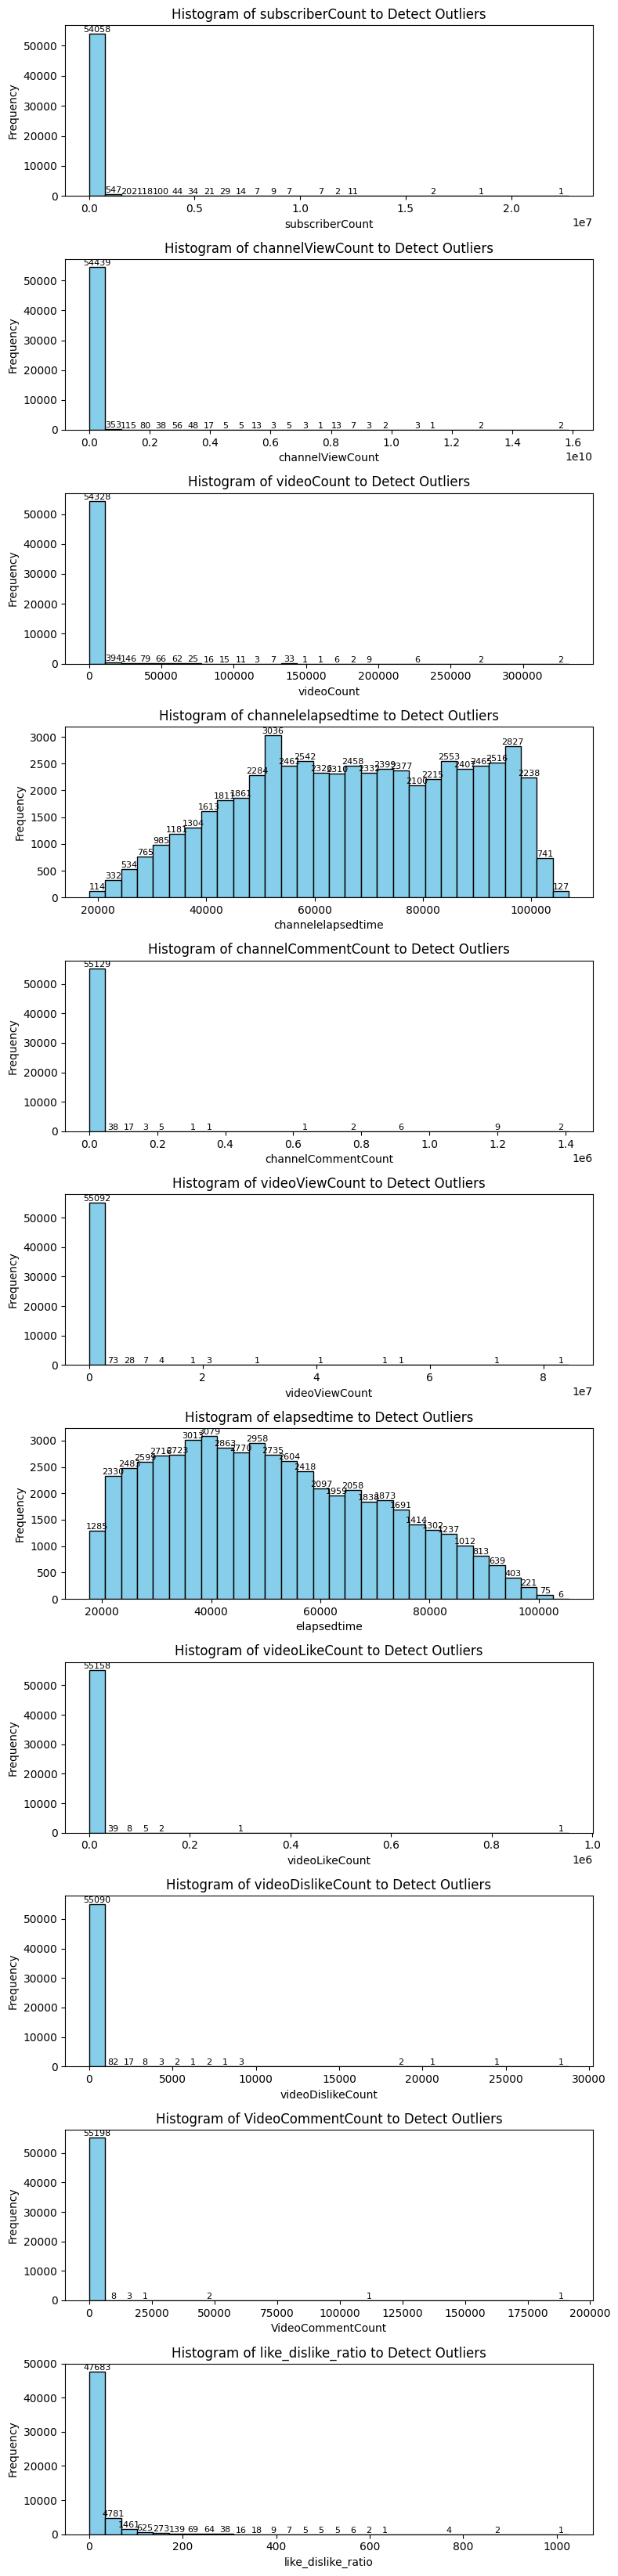

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(num.columns), 1, figsize=(8, len(num.columns) * 3))

for ax, feature in zip(axes, num.columns):
    counts, bins, patches = ax.hist(num[feature], bins=30, color='skyblue', edgecolor='black')


    for count, bin_edge in zip(counts, bins[:-1]):
        if count > 0:
            ax.text(bin_edge + (bins[1] - bins[0]) / 2, count,
                    f'{int(count)}',
                    ha='center', va='bottom', fontsize=8)

    ax.set_title(f"Histogram of {feature} to Detect Outliers")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


**Observation：**

The histograms reveal that most metrics exhibit **significant right-skewed distributions**. For example:  
- **Subscriber Count**: There are **54,058** channels in the lowest range, while only a few channels have more than **15-20 million** subscribers.  
- **Channel View Count**: **54,439** channels have view counts in the lowest range, but some channels reach up to **16 billion** views.  
- **Video Count**: **54,320** channels have fewer than **50,000** videos.  

These distribution patterns indicate that **log transformations** and **standardization** are necessary during analysis to effectively handle skewed distributions and outliers, improving model performance and result stability.

In [ ]:
df_youtube['log_subscriber_count'] = np.log(df_youtube['subscriberCount'] + 1)

Original Skewness: 1.865034222864842
Log-Transformed Skewness: -0.8253950380646785


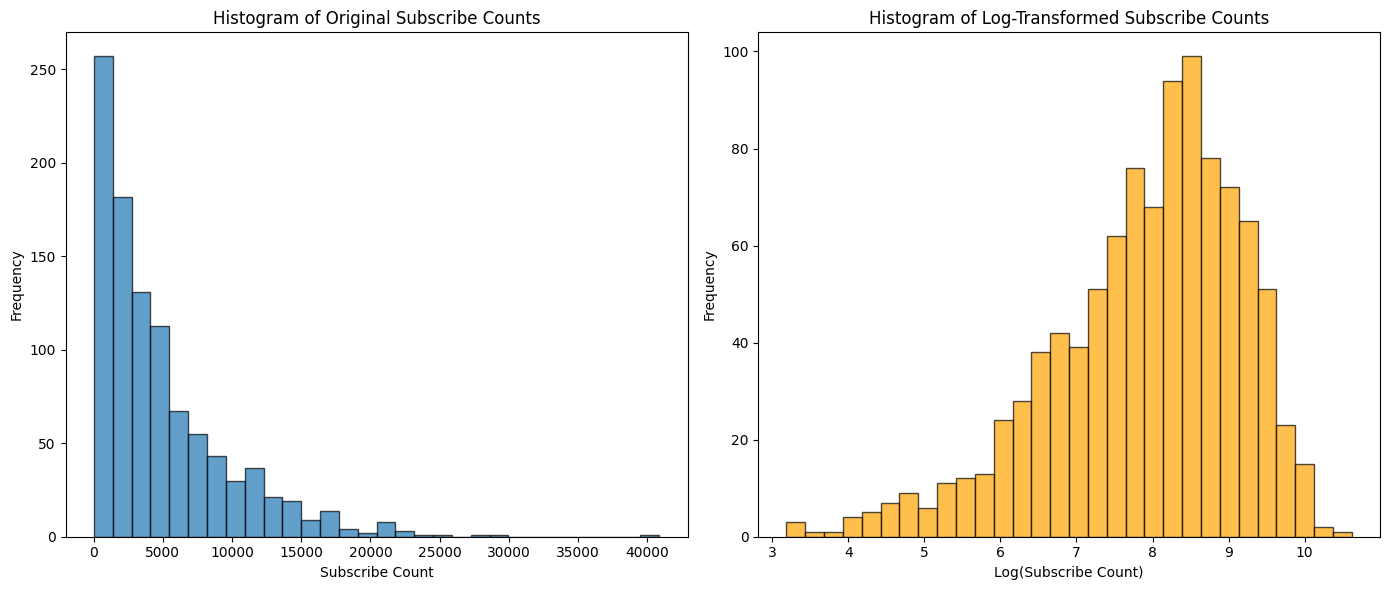

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

np.random.seed(42)
subscribe_counts = np.random.exponential(scale=5000, size=1000)  # 模拟偏态分布
data = pd.DataFrame({'subscribeCount': subscribe_counts})

data['log_subscribeCount'] = np.log1p(data['subscribeCount'])

print(f"Original Skewness: {skew(data['subscribeCount'])}")
print(f"Log-Transformed Skewness: {skew(data['log_subscribeCount'])}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data['subscribeCount'], bins=30, alpha=0.7, edgecolor='black')
plt.title("Histogram of Original Subscribe Counts")
plt.xlabel("Subscribe Count")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(data['log_subscribeCount'], bins=30, alpha=0.7, edgecolor='black', color='orange')
plt.title("Histogram of Log-Transformed Subscribe Counts")
plt.xlabel("Log(Subscribe Count)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55214 entries, 112733 to 162741
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   channelId             55214 non-null  object             
 1   videoCategoryId       55214 non-null  int64              
 2   channelViewCount      55214 non-null  int64              
 3   videoCount            55214 non-null  int64              
 4   subscriberCount       55214 non-null  int64              
 5   videoId               55214 non-null  object             
 6   channelelapsedtime    55214 non-null  int64              
 7   channelCommentCount   55214 non-null  int64              
 8   videoViewCount        55214 non-null  int64              
 9   elapsedtime           55214 non-null  int64              
 10  videoLikeCount        55214 non-null  int64              
 11  videoDislikeCount     55214 non-null  int64              
 12  vid

In [ ]:
df_youtube.describe()

,videoCategoryId,channelViewCount,videoCount,subscriberCount,channelelapsedtime,channelCommentCount,videoViewCount,elapsedtime,videoLikeCount,videoDislikeCount,VideoCommentCount,like_dislike_ratio,log_subscriber_count
count,55214.000000,5.521400e+04,55214.000000,5.521400e+04,55214.000000,5.521400e+04,5.521400e+04,55214.000000,55214.000000,55214.000000,55214.000000,55214.000000,55214.000000
mean,17.488409,4.021993e+07,1117.654997,7.273009e+04,67861.601206,7.000102e+02,5.178685e+04,50866.830605,284.187634,17.649582,42.310827,18.233183,6.194410
std,7.855530,3.450480e+08,7764.032229,4.951288e+05,20586.056536,2.112219e+04,6.985596e+05,19706.167861,4843.423896,254.033975,1015.238046,32.745758,3.411700
min,1.000000,0.000000e+00,0.000000,0.000000e+00,18408.000000,0.000000e+00,1.003000e+03,17640.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,4.677000e+04,16.000000,3.600000e+01,52056.000000,0.000000e+00,2.187000e+03,34872.000000,6.000000,0.000000,1.000000,3.000000,3.610918
50%,20.000000,3.811675e+05,67.000000,3.780000e+02,68160.000000,2.000000e+00,4.791000e+03,48672.000000,17.000000,1.000000,4.000000,8.000000,5.937536
75%,24.000000,3.307841e+06,314.000000,4.996750e+03,85704.000000,2.300000e+01,1.500400e+04,65664.000000,62.000000,5.000000,14.000000,20.000000,8.516743
max,44.000000,1.587039e+10,331770.000000,2.273293e+07,106945.000000,1.409902e+06,8.449583e+07,105505.000000,953651.000000,28792.000000,191498.000000,1026.000000,16.939325


# **Model**

In [ ]:
numerical= df_youtube[['channelViewCount','videoCount','channelelapsedtime',
       'channelCommentCount', 'videoViewCount', 'elapsedtime',
       'videoLikeCount', 'videoDislikeCount','VideoCommentCount', 'like_dislike_ratio']]
numerical.info()
categorical = df_youtube[['videoCategoryId','TimeOfDay']]


<class 'pandas.core.frame.DataFrame'>
Index: 55214 entries, 112733 to 162741
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channelViewCount     55214 non-null  int64  
 1   videoCount           55214 non-null  int64  
 2   channelelapsedtime   55214 non-null  int64  
 3   channelCommentCount  55214 non-null  int64  
 4   videoViewCount       55214 non-null  int64  
 5   elapsedtime          55214 non-null  int64  
 6   videoLikeCount       55214 non-null  int64  
 7   videoDislikeCount    55214 non-null  int64  
 8   VideoCommentCount    55214 non-null  int64  
 9   like_dislike_ratio   55214 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 4.6 MB


## **preprocessor**

In [ ]:
from sklearn.model_selection import train_test_split
X = pd.concat([numerical, categorical], axis=1)
y = df_youtube['log_subscriber_count']
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=7)

(55214, 12) (55214,)


In [ ]:
# create a preprocessor_pipe
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

numeric_features = list(numerical.columns)
categorical_features = list(categorical.columns)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_pipe = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
preprocessor_pipe

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True)),
                                                 ('scaler', StandardScaler())]),
                                 ['channelViewCount', 'videoCount',
                                  'channelelapsedtime', 'channelCommentCount',
                                  'videoViewCount', 'elapsedtime',
                                  'videoLikeCount', 'videoDislikeCount',
                                  'VideoCommentCount', 'like_dislike_ratio']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['videoCategoryId', 'TimeOfDay'])])

## **Use OLS Model to Overviw**

In [ ]:
# OLS model
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#X transfer by preprocessor pipeline
X_train_transformed = preprocessor_pipe.fit_transform(X_train)
X_test_transformed = preprocessor_pipe.transform(X_test)

#feature names
onehot_encoder = preprocessor_pipe.named_transformers_['cat']['onehot']
categories = onehot_encoder.categories_
categorical_feature_names = []

for feature, cats in zip(categorical_features, categories):
    categorical_feature_names.extend([f"{feature}_{cat}" for cat in cats])

all_feature_names = numeric_features + categorical_feature_names
X_train_ols = pd.DataFrame(X_train_transformed, columns=all_feature_names, index=y_train.index)
X_train_ols = sm.add_constant(X_train_ols)

#OLS
ols_model = sm.OLS(y_train, X_train_ols).fit()
print(ols_model.summary())


                             OLS Regression Results                             
Dep. Variable:     log_subscriber_count   R-squared:                       0.874
Model:                              OLS   Adj. R-squared:                  0.874
Method:                   Least Squares   F-statistic:                     8670.
Date:                  Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                          11:09:11   Log-Likelihood:                -62242.
No. Observations:                 38649   AIC:                         1.245e+05
Df Residuals:                     38617   BIC:                         1.248e+05
Df Model:                            31                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const 

**Observation:**

•	The model has an R-squared value of 0.87, indicating that it explains 87% of the variance in the target variable (log_subscriber_count)

•	F-statistic of 8670 with a p-value of 0.00 suggests the model is statistically significant

## **feature selection**

In [ ]:
preprocessor_pipe.fit(X_train)

ohe = preprocessor_pipe.named_transformers_['cat']['onehot']
categories = ohe.categories_

categorical_feature_names = []
for feature, cats in zip(categorical_features, categories):
    categorical_feature_names.extend([f"{feature}_{cat}" for cat in cats])

all_feature_names = numeric_features + categorical_feature_names

In [ ]:
print(all_feature_names)
len(all_feature_names)

['channelViewCount', 'videoCount', 'channelelapsedtime', 'channelCommentCount', 'videoViewCount', 'elapsedtime', 'videoLikeCount', 'videoDislikeCount', 'VideoCommentCount', 'like_dislike_ratio', 'videoCategoryId_1', 'videoCategoryId_2', 'videoCategoryId_10', 'videoCategoryId_15', 'videoCategoryId_17', 'videoCategoryId_19', 'videoCategoryId_20', 'videoCategoryId_22', 'videoCategoryId_23', 'videoCategoryId_24', 'videoCategoryId_25', 'videoCategoryId_26', 'videoCategoryId_27', 'videoCategoryId_28', 'videoCategoryId_29', 'videoCategoryId_43', 'videoCategoryId_44', 'TimeOfDay_Afternoon', 'TimeOfDay_Early Morning', 'TimeOfDay_Evening', 'TimeOfDay_Morning', 'TimeOfDay_Night', 'TimeOfDay_wee hours']


33

### random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=10, random_state=42).fit(preprocessor_pipe.fit_transform(X_train), y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=all_feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

Feature Importances:
channelViewCount           8.355649e-01
elapsedtime                3.308164e-02
videoLikeCount             2.578735e-02
videoViewCount             1.840920e-02
channelelapsedtime         1.599431e-02
channelCommentCount        1.599162e-02
videoCount                 1.524672e-02
VideoCommentCount          8.569551e-03
like_dislike_ratio         8.299008e-03
videoDislikeCount          4.316742e-03
videoCategoryId_26         1.641267e-03
videoCategoryId_10         1.468491e-03
TimeOfDay_Afternoon        1.146337e-03
TimeOfDay_Evening          1.145273e-03
TimeOfDay_Morning          1.115641e-03
videoCategoryId_24         1.106622e-03
TimeOfDay_Night            1.105372e-03
videoCategoryId_17         1.013946e-03
videoCategoryId_20         9.806082e-04
TimeOfDay_Early Morning    9.009194e-04
videoCategoryId_27         8.952842e-04
videoCategoryId_22         8.910216e-04
TimeOfDay_wee hours        8.224060e-04
videoCategoryId_25         6.975172e-04
videoCategoryId_2  

### SelectKBest

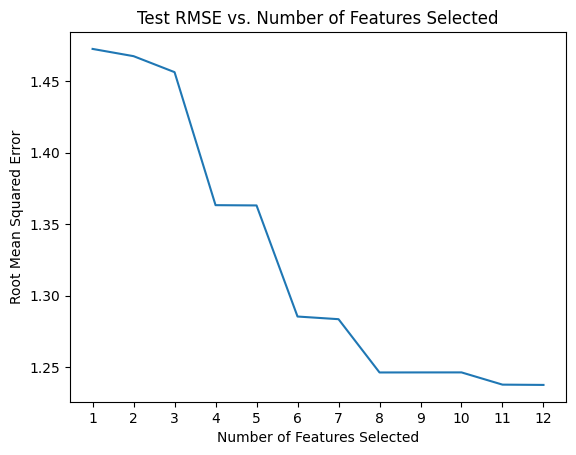

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# create pipeline
k_best_pipe = Pipeline([
    ('prep', preprocessor_pipe),
    ('select', SelectKBest(score_func=f_regression)),
    ('model', LinearRegression())
])

# grid-search
param_grid = {
    'select__k': range(1, X.shape[1] + 1)
}

grid_search = GridSearchCV(k_best_pipe, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X, y)

# plot
cv_res = pd.DataFrame(grid_search.cv_results_)
plt.plot(cv_res["param_select__k"], -cv_res["mean_test_score"])
plt.xlabel("Number of Features Selected")
plt.ylabel("Root Mean Squared Error")
plt.title("Test RMSE vs. Number of Features Selected")
plt.xticks(np.arange(min(cv_res["param_select__k"]), max(cv_res["param_select__k"]) + 1, 1))
plt.show()

best_model = grid_search.best_estimator_

In [ ]:
# Get the selected feature name out
selected_features = best_model.named_steps['select'].get_support()
selected_feature_names = [all_feature_names[i] for i in range(len(all_feature_names)) if selected_features[i]]

print(f"\nThe selected features are: {selected_feature_names}")
best_rmse = -grid_search.best_score_
print("Best RMSE:", best_rmse)


The selected features are: ['channelViewCount', 'videoCount', 'channelCommentCount', 'videoViewCount', 'elapsedtime', 'videoLikeCount', 'videoDislikeCount', 'VideoCommentCount', 'like_dislike_ratio', 'videoCategoryId_20', 'videoCategoryId_22', 'videoCategoryId_26']
Best RMSE: 1.2375255907857816


**Conclusion:**

Remove channelelapsedtime, TimeOfDay

Best RMSE: 1.238

### Select from models



In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd

# Create a pipeline
selected_pipe = Pipeline([
    ('prep', preprocessor_pipe),
    ('select', SelectFromModel(Lasso())),
    ('model', LinearRegression())
])
selected_pipe.fit(X_train, y_train)

# Extract and print the selected features
selected_features = selected_pipe.named_steps['select'].get_support()
selected_feature_names = [all_feature_names[i] for i in range(len(all_feature_names)) if selected_features[i]]

print(f'The number of selected features is {len(selected_features)}')
print(f'The selected features are {selected_feature_names}')
print(f'The coefficients are {np.round(selected_pipe["model"].coef_, 2)}')

The number of selected features is 33
The selected features are ['channelViewCount']
The coefficients are [3.08]


In [ ]:
param_grid = {
    'select__estimator__alpha': [10, 100, 1000],
    'select__threshold': ['mean', 'median']
}

# Create and fit the GridSearchCV
grid_search = GridSearchCV(selected_pipe, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# Extract and print the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Display the cross-validation results
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(cv_res.filter(regex='(^param_|mean_test_score)', axis=1))
best_model = grid_search.best_estimator_

# Print the selected features
selected_features = best_model.named_steps['select'].get_support()
selected_feature_names = [all_feature_names[i] for i in range(len(all_feature_names)) if selected_features[i]]
print(selected_feature_names)

Best parameters: {'select__estimator__alpha': 10, 'select__threshold': 'mean'}


,param_select__estimator__alpha,param_select__threshold,mean_test_score
0,10,mean,-1.211628
1,10,median,-1.211628
2,100,mean,-1.211628
3,100,median,-1.211628
4,1000,mean,-1.211628
5,1000,median,-1.211628


['channelViewCount', 'videoCount', 'channelelapsedtime', 'channelCommentCount', 'videoViewCount', 'elapsedtime', 'videoLikeCount', 'videoDislikeCount', 'VideoCommentCount', 'like_dislike_ratio', 'videoCategoryId_1', 'videoCategoryId_2', 'videoCategoryId_10', 'videoCategoryId_15', 'videoCategoryId_17', 'videoCategoryId_19', 'videoCategoryId_20', 'videoCategoryId_22', 'videoCategoryId_23', 'videoCategoryId_24', 'videoCategoryId_25', 'videoCategoryId_26', 'videoCategoryId_27', 'videoCategoryId_28', 'videoCategoryId_29', 'videoCategoryId_43', 'videoCategoryId_44', 'TimeOfDay_Afternoon', 'TimeOfDay_Early Morning', 'TimeOfDay_Evening', 'TimeOfDay_Morning', 'TimeOfDay_Night', 'TimeOfDay_wee hours']


**Conclusion:**
remove channelelapsedtime,TimeOfDay

Best RMSE: 1.212

### Backword Selection


In [ ]:
X_train_transformed = preprocessor_pipe.fit_transform(X_train)
X_train_transformed.shape[1]

33

In [ ]:
from sklearn.linear_model import Lasso, LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

sbs = SequentialFeatureSelector(LinearRegression(), forward=False,
                                k_features=(1, X.shape[1]),
                                scoring='neg_root_mean_squared_error')

backward_preprocess_pipeline = Pipeline([
    ('prep', preprocessor_pipe),
    ('select', sbs)
])

backward_preprocess_pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       validate=True)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['channelViewCount',
                                                   'videoCount',
                                                   'channelelapsedtime',
                                                   'channelCommentCount',
                                                   'videoViewCount',
                                                   'elapsedtime',
                                                   'videoLikeCount',
                                                   'videoDislikeCount',
                                                   'VideoCommentCount',
                                                   'like_dislike_ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['videoCategoryId',
                                                   'TimeOfDay'])])),
                ('select',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           forward=False, k_features=(1, 12),
                                           scoring='neg_root_mean_squared_error'))])

The selected features from backward selection are: ['channelViewCount', 'videoCount', 'channelelapsedtime', 'channelCommentCount', 'videoViewCount', 'elapsedtime', 'videoLikeCount', 'VideoCommentCount', 'like_dislike_ratio', 'videoCategoryId_26', 'videoCategoryId_27', 'videoCategoryId_28']
feature combination (0, 1, 2, 3, 4, 5, 6, 8, 9, 21, 22, 23) 
gave best RMSE of 1.2122159702347306.



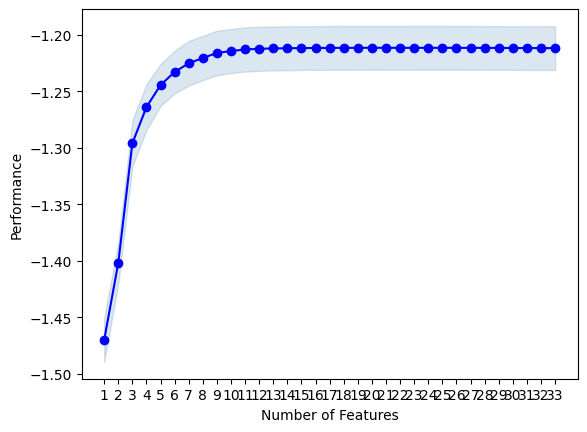

In [ ]:
selected_features_sbs = [all_feature_names[i] for i in sbs.k_feature_idx_ ]
print(f"The selected features from backward selection are: {selected_features_sbs}")
print(f'feature combination {sbs.k_feature_idx_} \ngave best RMSE of {-sbs.k_score_}.\n')
plot_sfs(sbs.get_metric_dict(), kind='std_err');

**Conclusion:**

1. SelectKBest

  Remove channelelapsedtime, TimeOfDay

  Best RMSE: 1.238

2. Select from model

  remove channelelapsedtime,TimeOfDay

  Best RMSE: 1.212

3. Backword Selection
  remove videoDislikeCount
  Best RMSE: 1.211


  Since the Backward Selection has the lowest RMSE, we use it in the next step



## **Model SELECTION**

### RMSE with all features

In [ ]:
#exploring different models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import PoissonRegressor

lin_reg = make_pipeline(preprocessor_pipe, LinearRegression())
tree_reg = make_pipeline(preprocessor_pipe, DecisionTreeRegressor())
forest_reg = make_pipeline(preprocessor_pipe, RandomForestRegressor(random_state=42))
svm_reg = make_pipeline(preprocessor_pipe, SVR())
gb_reg = make_pipeline(preprocessor_pipe, GradientBoostingRegressor(random_state=42))
ps_reg = make_pipeline(preprocessor_pipe, PoissonRegressor())

In [ ]:
lin_cv_rmses = -cross_val_score(lin_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"Average Linear Regression Cross-Validation RMSE: {lin_cv_rmses.mean()}")

tree_cv_rmses = -cross_val_score(tree_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"Average Decision Tree Regression Cross-Validation RMSE: {tree_cv_rmses.mean()}")

svm_cv_rmses = -cross_val_score(svm_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"Average SVM Cross-Validation RMSE: {svm_cv_rmses.mean()}")

gb_cv_rmses = -cross_val_score(gb_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"Average Gradient Boosting Regression Cross-Validation RMSE: {gb_cv_rmses.mean()}")

rf_cv_rmses = -cross_val_score(forest_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"Average Random Forest Regression Cross-Validation RMSE: {rf_cv_rmses.mean()}")

ps_cv_rmses = -cross_val_score(ps_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"Average Poisson Regression Cross-Validation RMSE: {ps_cv_rmses.mean()}")

Average Linear Regression Cross-Validation RMSE: 1.2116276713051781
Average Decision Tree Regression Cross-Validation RMSE: 1.6927853685863066
Average SVM Cross-Validation RMSE: 1.1463207607180481
Average Gradient Boosting Regression Cross-Validation RMSE: 1.1696783316538268
Average Random Forest Regression Cross-Validation RMSE: 1.184888901700281
Average Poisson Regression Cross-Validation RMSE: 1.547023429580453


**NegativeBinomialRegression**

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.api as sm
import numpy as np

class NegativeBinomialRegression(BaseEstimator, RegressorMixin):
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.model_ = None

    def fit(self, X, y):
        X_with_const = sm.add_constant(X, has_constant='add')
        self.model_ = sm.GLM(y, X_with_const, family=sm.families.NegativeBinomial(alpha=self.alpha)).fit()
        return self

    def predict(self, X):
        X_with_const = sm.add_constant(X, has_constant='add')
        return self.model_.predict(X_with_const)

# Define a function to estimate alpha
def estimate_alpha(X, y):
    X_with_const = sm.add_constant(X, has_constant='add')
    model = sm.GLM(y, X_with_const, family=sm.families.Poisson()).fit()
    mu = model.fittedvalues
    resid = (y - mu) ** 2 - mu
    alpha = np.mean(resid / mu)
    return max(alpha, 1e-6)

In [ ]:
# Re-estimate alpha
alpha_estimate = estimate_alpha(X_train_transformed, y_train)
nb_reg = make_pipeline(preprocessor_pipe, NegativeBinomialRegression(alpha=alpha_estimate))

nb_cv_rmses = -cross_val_score(nb_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"Average Negative Binomial Regression Cross-Validation RMSE: {nb_cv_rmses.mean()}")

Average Negative Binomial Regression Cross-Validation RMSE: 1.5325592338560714


Linear Regression:----------------------1.2116276713051781

Decision Tree Regression:-----------1.6927853685863066

SVR: -------------------------------------------1.1463207607180481

Gradient Boosting Regression:----1.1696783316538268

Random Forest Regression:--------1.184888901700281

Poisson Regression: -------------------1.547023429580453

Negative Binomial Regression: ---1.5325592338560714



---


We explored Negative Binomial and Poisson regression models, which were not covered in class, based on our professor's suggestion due to the high number of zeroes in our dataset. However, since our other regression models performed better, we did not proceed with further optimization of these models.

Since, the **SVR, Gradient Boosting Regression and Random Forest Regression** has the lowest RMSE, we use them in the future steps.

### RMSE with selected features

In [ ]:
forest_reg2 = Pipeline([
    ('prep', preprocessor_pipe),
    ('select', sbs),
    ('model', RandomForestRegressor(random_state=42))
])

svm_reg2 = Pipeline([
    ('prep', preprocessor_pipe),
    ('select', sbs),
    ('model', SVR())
])

gb_reg2 = Pipeline([
    ('prep', preprocessor_pipe),
    ('select', sbs),
    ('model', GradientBoostingRegressor(random_state=42))
])

In [ ]:
rf_cv_rmses2 = -cross_val_score(forest_reg2, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)
print(f"Average Random Forest Regression with feature selection Cross-Validation RMSE: {rf_cv_rmses2.mean()}")

Average Random Forest Regression with feature selection Cross-Validation RMSE: 1.1921692070060432


In [ ]:
gb_cv_rmses2 = -cross_val_score(gb_reg2, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)
print(f"Average Gradient Boosting Regression with feature selection Cross-Validation RMSE: {gb_cv_rmses2.mean()}")

Average Gradient Boosting Regression with feature selection Cross-Validation RMSE: 1.1711363385182152


In [ ]:
svm_cv_rmses2 = -cross_val_score(svm_reg2, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)
print(f"Average SVR with feature selection Cross-Validation RMSE: {svm_cv_rmses2.mean()}")

Average Gradient Boosting Regression with feature selection Cross-Validation RMSE: 1.1503933051644815


In [ ]:
svm_diff = svm_cv_rmses.mean() - svm_cv_rmses2.mean()
gb_diff = gb_cv_rmses.mean() - gb_cv_rmses2.mean()
rf_diff = rf_cv_rmses.mean() - rf_cv_rmses2.mean()
print(svm_diff,gb_diff,rf_diff)

-0.004072544446433346 -0.0014580068643883504 -0.00728030530576218


Average Random Forest Regression with feature selection Cross-Validation RMSE: 1.1921692070060432

Average Gradient Boosting Regression with feature selection Cross-Validation RMSE: 1.1711363385182152

Average SVR with feature selection Cross-Validation RMSE: 1.1503933051644815

**Differences:**
*   RandomForest Difference: -0.00728030530576218

*   Gradient Difference: -0.0014580068643883504

*   SVR Difference: -0.004072544446433346

These feature selection steps **did not** improve the performance of our models. Therefore, we decided to forgo feature selection and retain all the original features.

## **Fine Tune Model**

### Gradient Boosting Regression

**Random search**

In [ ]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'gradientboostingregressor__n_estimators': randint(10, 100),
    'gradientboostingregressor__learning_rate': uniform(0.01, 0.99),
    'gradientboostingregressor__max_depth': randint(1, 6),
    'gradientboostingregressor__min_samples_split': randint(5, 20),
    'gradientboostingregressor__min_samples_leaf': randint(5, 20),
}
random_search_gb = RandomizedSearchCV(
    estimator= gb_reg,
    param_distributions=param_distribs,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_gb.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('log_transform',
                                                                                                FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                                                    validate=True)),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['channelViewCount',
                                                                                'videoCount',
                                                                                'channelelapsedtime',
                                                                                'channelCommentCount',...
                                        'gradientboostingregressor__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b218e960be0>,
                                        'gradientboostingregressor__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b218ad2e890>,
                                        'gradientboostingregressor__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b218e88c190>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
cv_res = pd.DataFrame(random_search_gb.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)


best_params_gb = random_search_gb.best_params_
print("Best Parameters: ", best_params_gb)
best_score_gb = random_search_gb.best_score_
print("Best CV Score (Neg Mean Squared Error): ", best_score_gb)
best_pipeline_gb = random_search_gb.best_estimator_

cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head(3)

Best Parameters:  {'gradientboostingregressor__learning_rate': 0.21586224623950695, 'gradientboostingregressor__max_depth': 4, 'gradientboostingregressor__min_samples_leaf': 10, 'gradientboostingregressor__min_samples_split': 17, 'gradientboostingregressor__n_estimators': 72}
Best CV Score (Neg Mean Squared Error):  -1.350831993621771


,param_gradientboostingregressor__learning_rate,param_gradientboostingregressor__max_depth,param_gradientboostingregressor__min_samples_leaf,param_gradientboostingregressor__min_samples_split,param_gradientboostingregressor__n_estimators,mean_test_score
14,0.215862,4,10,17,72,-1.350832
4,0.220216,4,9,5,85,-1.351152
11,0.238585,4,19,16,80,-1.352130


In [ ]:
gb_rmse_org = -cross_val_score(gb_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)
gb_rmse_tug = -cross_val_score(best_pipeline_gb, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)
gb_rmse_org2 = -cross_val_score(gb_reg, X_test, y_test, scoring="neg_root_mean_squared_error", cv=3)
gb_rmse_tug2 = -cross_val_score(best_pipeline_gb, X_test, y_test, scoring="neg_root_mean_squared_error", cv=3)
print(f"Original Model - Train RMSE: {gb_rmse_org.mean():.4f}, Test RMSE: {gb_rmse_org2.mean():.4f}")
print(f"Best Model - Train RMSE: {gb_rmse_tug.mean():.4f}, Test RMSE: {gb_rmse_tug2.mean():.4f}")

Original Model - Train RMSE: 1.1708, Test RMSE: 1.2066
Best Model - Train RMSE: 1.1622, Test RMSE: 1.2052


Model Performance (RMSE):

Original Model: **Train RMSE: 1.1708 & Test RMSE: 1.2066**

Best Model (after optimization):**Train RMSE: 1.1622  &    Test RMSE: 1.2052**

### Random Forest

**random search**

In [ ]:
param_distributions = {
    'randomforestregressor__n_estimators': randint(50, 150),
    'randomforestregressor__max_depth': randint(5, 15),
    'randomforestregressor__min_samples_split': randint(5, 15),
    'randomforestregressor__min_samples_leaf': randint(2, 5)
}

# Randomized search
random_search_fr = RandomizedSearchCV(
    estimator=forest_reg,
    param_distributions=param_distributions,
    n_iter=10,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit randomized search
random_search_fr.fit(X_train, y_train)

best_params_fr = random_search_fr.best_params_
best_score_fr = -random_search_fr.best_score_
best_pip_fr = random_search_fr.best_estimator_

# Best parameters and score
print("Best Parameters:", best_params_fr)
print("Best RMSE:", best_score_fr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'randomforestregressor__max_depth': 13, 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__min_samples_split': 9, 'randomforestregressor__n_estimators': 100}
Best RMSE: 1.1768099868807338


In [ ]:
forest_rmse_org = -cross_val_score(forest_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)
forest_rmse_tug = -cross_val_score(best_pip_fr, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)
forest_rmse_org2 = -cross_val_score(forest_reg, X_test, y_test, scoring="neg_root_mean_squared_error", cv=3)
forest_rmse_tug2 = -cross_val_score(best_pip_fr, X_test, y_test, scoring="neg_root_mean_squared_error", cv=3)

In [ ]:
print(f"Original Model - Train RMSE: {forest_rmse_org.mean():.4f}, Test RMSE: {forest_rmse_org2.mean():.4f}")
print(f"Best Model - Train RMSE: {forest_rmse_tug.mean():.4f}, Test RMSE: {forest_rmse_tug2.mean():.4f}")

Original Model - Train RMSE: 1.1844, Test RMSE: 1.2326
Best Model - Train RMSE: 1.1768, Test RMSE: 1.2231


Model Performance (RMSE):

Original Model: **Train RMSE: 1.1844 & Test RMSE: 1.2326**

Best Model (after optimization):**Train RMSE: 1.1768  &    Test RMSE: 1.2231**

### SVR

**random search**

In [ ]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
param_distributions_svr = {
    'svr__C': uniform(loc=0.1, scale=10),
    'svr__epsilon': uniform(loc=0.01, scale=0.2),
}

random_search_svr = RandomizedSearchCV(
    estimator=svm_reg,
    param_distributions=param_distributions_svr,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search_svr.fit(X_train, y_train)

best_params_svr = random_search_svr.best_params_
best_score_svr = -random_search_svr.best_score_
best_pip_svr = random_search_svr.best_estimator_

print("Best params found:", best_params_svr)
print("Best CV score:", best_score_svr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params found: {'svr__C': 1.6601864044243653, 'svr__epsilon': 0.041198904067240534}
Best CV score: 1.3201179083893162


In [ ]:
svr_rmse_org = -cross_val_score(svm_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)
svr_rmse_tug = -cross_val_score(best_pip_svr, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)
svr_rmse_org2 = -cross_val_score(svm_reg, X_test, y_test, scoring="neg_root_mean_squared_error", cv=3)
svr_rmse_tug2 = -cross_val_score(best_pip_svr, X_test, y_test, scoring="neg_root_mean_squared_error", cv=3)

In [ ]:
print(f"Original Model - Train RMSE: {svr_rmse_org.mean():.4f}, Test RMSE: {svr_rmse_org2.mean():.4f}")
print(f"Best Model - Train RMSE: {svr_rmse_tug.mean():.4f}, Test RMSE: {svr_rmse_tug2.mean():.4f}")

Original Model - Train RMSE: 1.1490, Test RMSE: 1.2005
Best Model - Train RMSE: 1.1489, Test RMSE: 1.1991


**bagging**

In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import BaggingRegressor

column_names = X.columns.tolist()

class DataFrameRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, estimator, column_names):
        self.estimator = estimator
        self.column_names = column_names

    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.column_names)
        if y is not None and len(y.shape) > 1 and y.shape[1] == 1:
            y = y.ravel()
        self.estimator.fit(X, y)
        return self

    def predict(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.column_names)
        return self.estimator.predict(X)

tuned_svm = best_pip_svr
wrapped_estimator = DataFrameRegressorWrapper(tuned_svm, column_names)

bagging_svm = BaggingRegressor(
    estimator=wrapped_estimator,
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)

bagging_svm.fit(X_train, y_train)

BaggingRegressor(estimator=DataFrameRegressorWrapper(column_names=['channelViewCount',
                                                                   'videoCount',
                                                                   'channelelapsedtime',
                                                                   'channelCommentCount',
                                                                   'videoViewCount',
                                                                   'elapsedtime',
                                                                   'videoLikeCount',
                                                                   'videoDislikeCount',
                                                                   'VideoCommentCount',
                                                                   'like_dislike_ratio',
                                                                   'videoCategoryId',
                                                                   'TimeOfDay'],
                                                     estimator=Pipeline(steps=[('columntransformer',
                                                                                ColumnTransformer(tra...
                                                                                                                  'videoViewCount',
                                                                                                                  'elapsedtime',
                                                                                                                  'videoLikeCount',
                                                                                                                  'videoDislikeCount',
                                                                                                                  'VideoCommentCount',
                                                                                                                  'like_dislike_ratio']),
                                                                                                                ('cat',
                                                                                                                 Pipeline(steps=[('imputer',
                                                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                                                 ('onehot',
                                                                                                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                                                                                                 ['videoCategoryId',
                                                                                                                  'TimeOfDay'])])),
                                                                               ('svr',
                                                                                SVR(C=1.6601864044243653,
                                                                                    epsilon=0.041198904067240534))])),
                 n_jobs=-1, random_state=42)

In [ ]:
rmse_svm_train = -cross_val_score(bagging_svm, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)
rmse_svm_test = -cross_val_score(bagging_svm, X_test, y_test, scoring="neg_root_mean_squared_error", cv=3)
print(rmse_svm_train.mean(),rmse_svm_test.mean())

1.1493210014390496 1.2001444958127705


Model Performance (RMSE):

Original Model: **Train RMSE: 1.1490 & Test RMSE: 1.2005**

Model (after optimization):**Train RMSE: 1.1489  &    Test RMSE: 1.1991**

Best Model (after bagging): **Train RMSE: 1.1493  &    Test RMSE: 1.2001**


Although RMSE increase after bagging, but it is minor and the model performs maybe more consistently across different datasets, this increase can be seen as a sign of improved generalization rather than a performance decline.




---
**Conclusion for The Fine Tune Model Part**

1. **Why Bagging for SVR:**  
   SVR is a single model, not an ensemble. By applying Bagging, we introduced ensemble techniques to improve its performance, making it more robust and better at generalizing. Random Forest and Gradient Boosting are already ensemble methods, so they don't need extra Bagging.

2. **Model Performance:**  
   The Train RMSE and Test RMSE are close for all three models, indicating consistent performance and no significant overfitting.

3. **Conclusion:**  
   The models generalize well, and applying Bagging to SVR effectively enhances its robustness without altering its core structure.

## **plot the result for each model**

In [ ]:
predictions_svr = bagging_svm.predict(X_test)
predictions_rf = best_pip_fr.predict(X_test)
predictions_gb = best_pipeline_gb.predict(X_test)

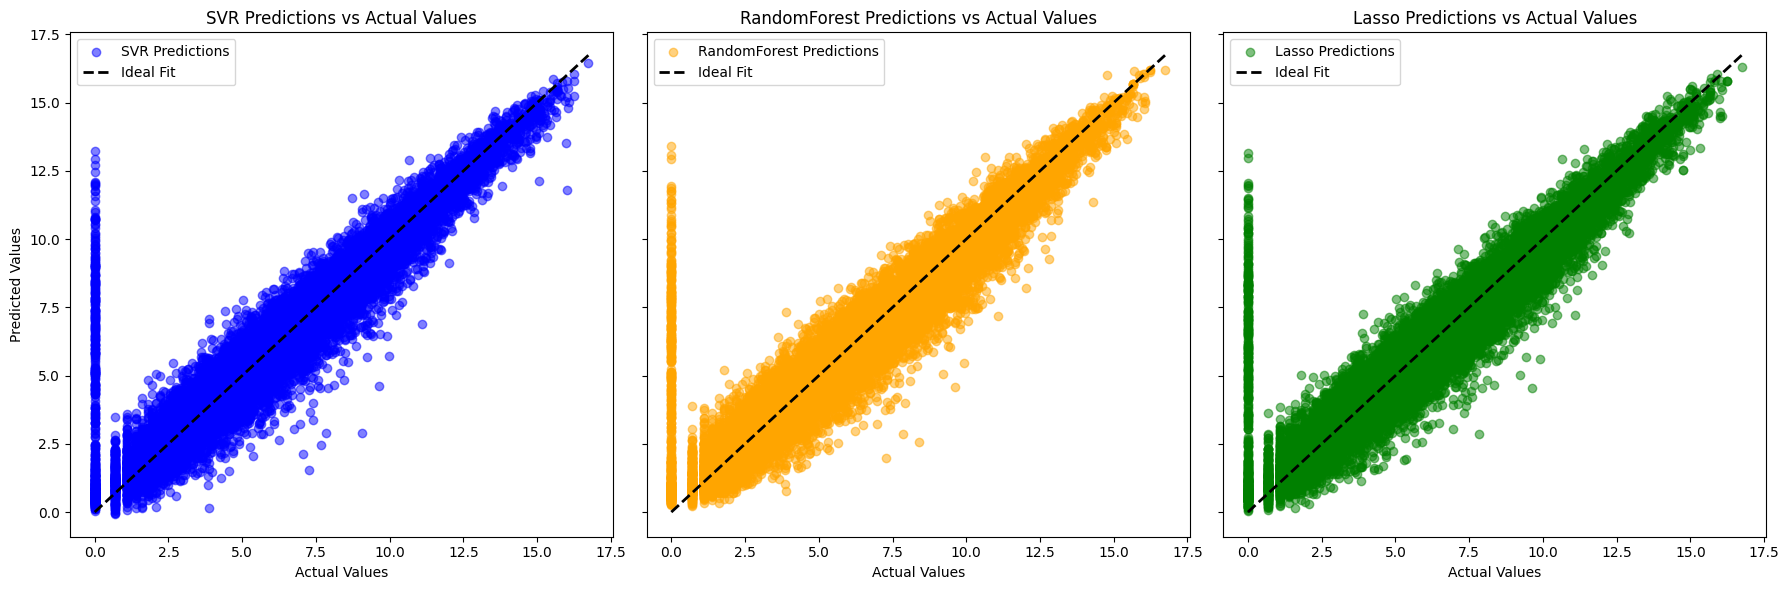

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# SVR Predictions
axes[0].scatter(y_test, predictions_svr, color='blue', alpha=0.5, label='SVR Predictions')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
axes[0].set_title('SVR Predictions vs Actual Values')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].legend()

# RandomForest Predictions
axes[1].scatter(y_test, predictions_rf, color='orange', alpha=0.5, label='RandomForest Predictions')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
axes[1].set_title('RandomForest Predictions vs Actual Values')
axes[1].set_xlabel('Actual Values')
axes[1].legend()

# SVM Predictions
axes[2].scatter(y_test, predictions_gb, color='green', alpha=0.5, label='Gradient Boosting Predictions')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
axes[2].set_title('Gradient Boosting Predictions vs Actual Values')
axes[2].set_xlabel('Actual Values')
axes[2].legend()

plt.tight_layout()
plt.show()

## **STACKING**

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error

ols = LinearRegression()

stacking_model = StackingRegressor(
    estimators=[
        ('svr', bagging_svm),
        ('rf', best_pip_fr),
        ('gb', best_pipeline_gb)
    ],
    final_estimator=ols,
    cv=5
)

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Stacking RMSE: {rmse}")

Stacking RMSE: 1.1732776953944268


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"Stacking R²: {r2:.4f}")


Stacking R²: 0.8809


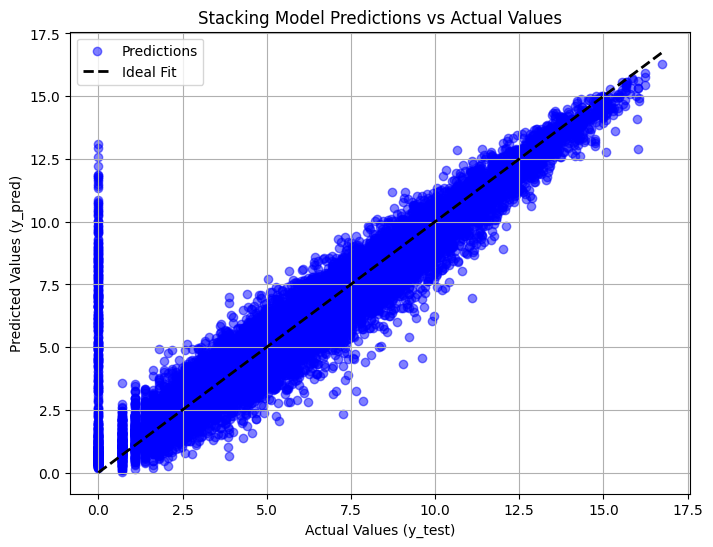

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Stacking Model Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

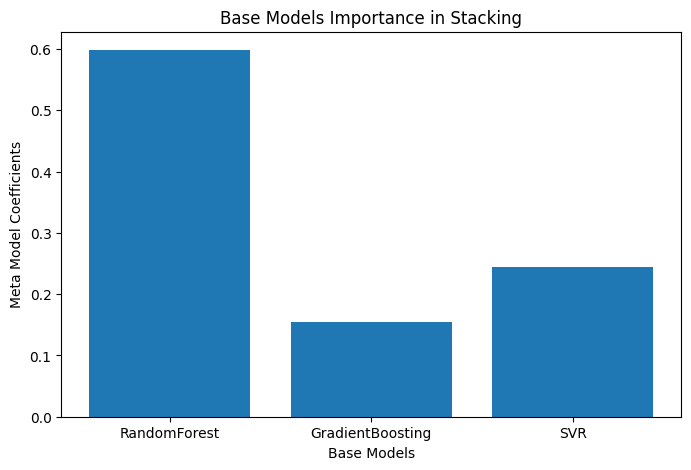

In [ ]:
meta_model_coefficients = stacking_model.final_estimator_.coef_
base_model_names = ['RandomForest', 'GradientBoosting', 'SVR']

plt.figure(figsize=(8, 5))
plt.bar(base_model_names, meta_model_coefficients)
plt.xlabel('Base Models')
plt.ylabel('Meta Model Coefficients')
plt.title('Base Models Importance in Stacking')
plt.show()

In [ ]:
meta_model_coefficients

array([0.598248  , 0.15457649, 0.24379354])

**Stacking Model Performance**

The Stacking model achieved an RMSE of **1.1733** and R^2 of **0.8809**, demonstrating solid predictive performance. This value suggests that the Stacking approach effectively combines the strengths of its base models, resulting in improved generalization ability.

---

**1. Stacking Model Predictions vs Actual Values**

The scatter plot shows the relationship between predicted and actual values:

- Data points align closely along the "Ideal Fit" line, showing high prediction accuracy.
- Minimal deviation suggests accurate predictions across the data range.
- Tight clustering of points indicates the model generalizes well on unseen data.

---

**2.Base Model Importance in Stacking**

  The bar chart illustrates the contributions of each base model (meta-model coefficients):

- Random Forest: 0.5982, the highest contributor.
- SVR: 0.2438, the second-highest.
- Gradient Boosting: 0.1546, the least contributor.

These weights show how the meta-model balances predictions to form the final result.

---

**Conclusion:**
The Stacking model successfully leverages the strengths of its base models, particularly the Random Forest, to achieve robust predictive performance as evidenced by its RMSE and prediction accuracy.

# **Feature importance**

**SVR's Lack of Built-in Feature Importance**:

SVR is a hyperplane-based model that classifies data using support vectors, rather than splitting nodes like tree-based models to measure feature importance. Therefore, it does not have a built-in feature_importances_ attribute and cannot directly provide feature importance. As a result, when calculating the weighted feature importance, we only used tree-based models — RandomForest and GradientBoosting — which can provide feature importance.

**SVR's Contribution in Stacking**:

Nevertheless, SVR's contribution in the Stacking model can be reflected through the meta-model's coefficients, indicating that SVM still plays a significant role in the overall prediction.

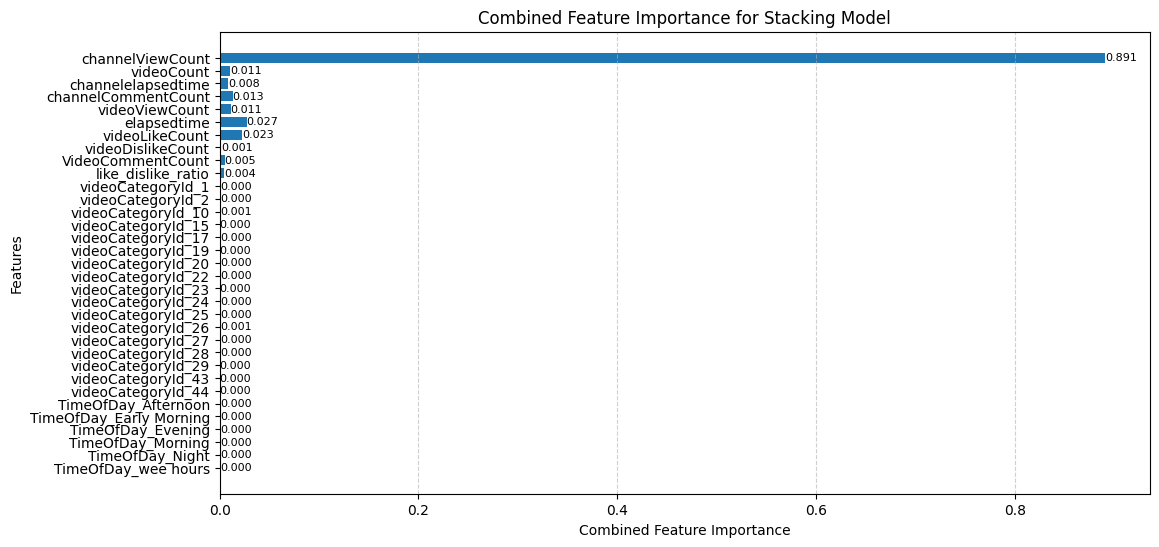

In [ ]:
meta_model_coefficients = stacking_model.final_estimator_.coef_

# Obtain the feature importance of the underlying model
rf_importance = best_pip_fr.steps[-1][1].feature_importances_
gb_importance = best_pipeline_gb.steps[-1][1].feature_importances_

cof = meta_model_coefficients[0] + meta_model_coefficients[1]

# Calculate the weighted feature importance
combined_importance = (
    (meta_model_coefficients[0]/cof) * rf_importance +
    (meta_model_coefficients[1]/cof) * gb_importance
)

combined_importance /= np.sum(combined_importance)

plt.figure(figsize=(12, 6))
bars = plt.barh(all_feature_names, combined_importance)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.3f}',
             va='center', ha='left', fontsize=8, color='black')

plt.xlabel('Combined Feature Importance')
plt.ylabel('Features')
plt.title('Combined Feature Importance for Stacking Model')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

**Observations:**

•	channelViewCount shows highest importance (0.885)

•	elapsedtime is second most important (0.027)

•	videoLikeCount ranks third (0.022)

•	Video category features show relatively low importance

# **Conclusion**

This project successfully demonstrated the application of machine learning techniques to predict YouTube channel subscriber counts. By addressing challenges such as skewed data distributions, irrelevant features, and inconsistencies in feature selection, we established a robust pipeline for data cleaning, analysis, and modeling. The use of both numerical and categorical video-related features allowed us to capture a wide range of factors influencing subscriber growth.

Our results highlight the critical role of certain features, such as channel view counts and engagement metrics, in driving subscriber growth. The best-performing models, improved through hyperparameter tuning and ensemble methods like bagging and stacking, provided reliable predictions. These insights emphasize the value of blending different modeling approaches to achieve better accuracy and generalization.

Through this analysis, we gained valuable insights into the factors that contribute to channel success. For creators, the findings offer actionable guidance to optimize their content and engagement strategies to attract more subscribers. For marketers and analysts, the model serves as a tool to predict audience behavior, measure channel potential, and guide investment decisions.

Overall, this project not only enhances our understanding of the dynamics behind subscriber growth but also opens avenues for future research. Future work could explore incorporating more advanced natural language processing techniques on video descriptions or comments, as well as analyzing temporal patterns in video publishing. By building upon this foundation, we can continue refining prediction models and providing deeper insights into what drives success on YouTube.

**Future Steps：**
1. Expanding the dataset is crucial to improve model generalizability. This includes incorporating external datasets to account for broader trends and user behaviors across different types of YouTube channels. Additionally, updating the current dataset with recent entries will enable the model to provide real-time and more accurate predictions, keeping up with evolving platform dynamics.

2. Since channel view count plays a dominant role in our model, it is worth analyzing the factors that influence this metric. Understanding what drives view counts, such as video content type, upload frequency, or audience engagement, could provide deeper insights and further refine the prediction model.




# **challenge**

1. The dataset presented several challenges, particularly with skewed distributions and irrelevant features, which could hinder model performance. To tackle these issues, we applied log scaling and standardization to normalize the data and improve model accuracy.

2. Data quality was another significant concern. High RMSE values pointed to errors and irrelevant features in the raw data（which is not shown inside the colab）. We addressed this by correcting these errors, eliminating redundant columns, and selecting useful features to enhance the dataset's integrity.

3. The dataset's large size posed significant computational challenges. Colab's processing limitations meant that each model required several hours to run. To mitigate this, we randomly selected 50,000 rows from the original 500,000-row dataset. While this reduced runtime, the Stacking model still took over an hour to execute. Managing computational resources effectively remains a key challenge for handling large datasets.




# **Generative AI Disclosure**

In our project, our team used ChatGPT as a generative AI tool to support several aspects of our work. Specifically, we used ChatGPT for:

Coding Assistance: ChatGPT was used to help identify potential errors in code, suggest alternative coding approaches, and ensure the functionality of our queries and data manipulation.
Grammar Checks: ChatGPT was utilized to review and refine the language used in our project, ensuring that our explanations, summaries, and reports are clear, concise, and grammatically correct.